In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import (adjusted_mutual_info_score, 
  adjusted_rand_score,
  silhouette_score)
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, 
                            cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
def visualize(X, labels):
    
    unique_labels = set(labels)
    N = len(unique_labels)
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('CMAP', cmaplist, cmap.N)
    
    
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap)
    #borders = np.array([np.abs(X.min(axis=0)[0]), np.abs(X.max(axis=0)[0]), np.abs(X.min(axis=0)[1]), np.abs(X.max(axis=0)[1])])
    #plt.xlim(borders.ma - 2, X.max(axis=0)[0] + 2)
    
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    
    plt.legend(*scatter.legend_elements(), fontsize=16)

In [ ]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

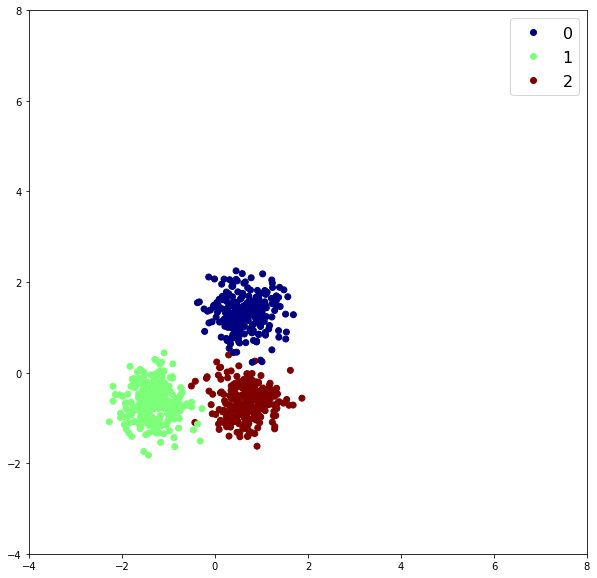

In [ ]:
visualize(X, labels_true)

In [ ]:
model = MeanShift()

In [ ]:
model.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [ ]:
res2 = model.labels_

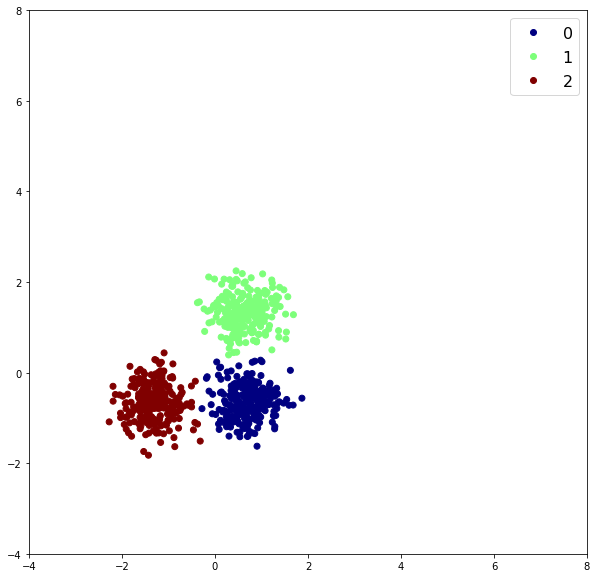

In [ ]:
visualize(X, res2)

In [ ]:
adjusted_rand_score(labels_true, res2)

0.9682515649309645

In [ ]:
adjusted_mutual_info_score(labels_true, res2)

0.9445999199156632

In [ ]:
silhouette_score(X, res2)

0.6496075455022047

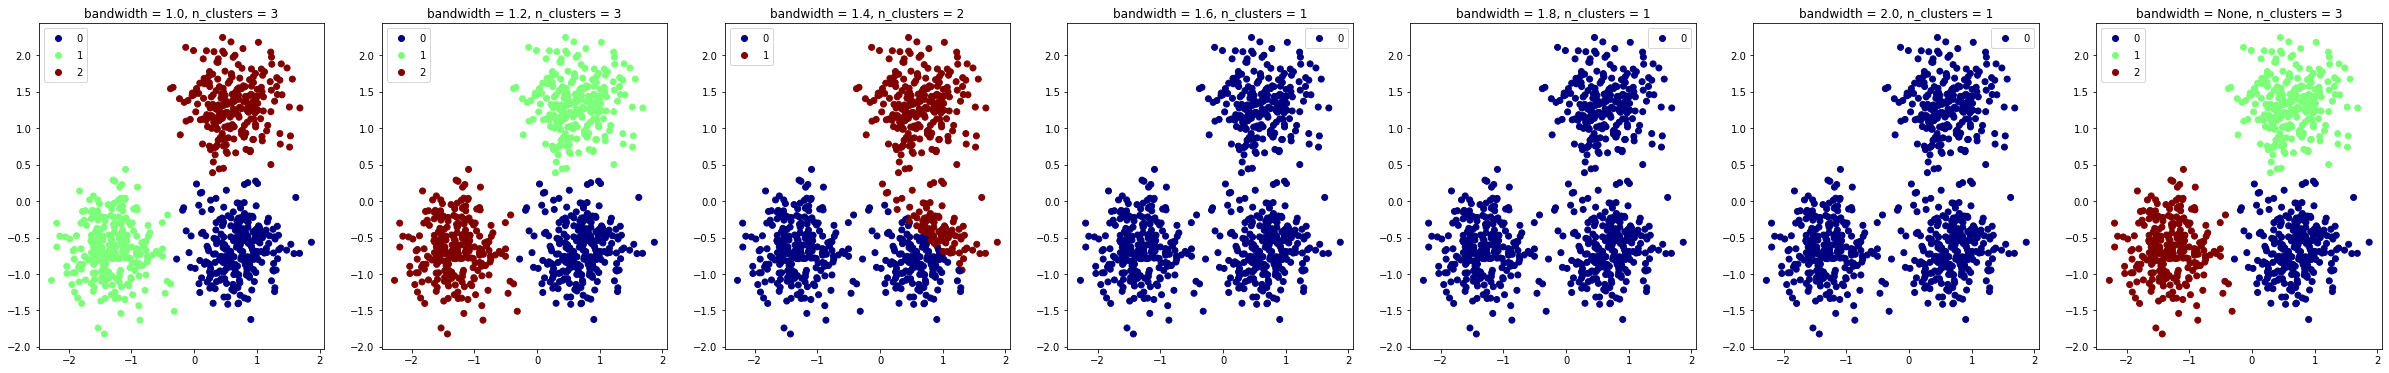

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist


fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(42, 6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap_ = cmap.from_list('CMAP', cmaplist, cmap.N)


b_values = list(np.linspace(1, 2, 6)) + [None]
n_clusters = []
distortions = []

for i, b in enumerate(b_values):
  labels = MeanShift(bandwidth=b).fit_predict(X)
  n = len(np.unique(labels))
  n_clusters.append(n)
  scatter = axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap_)
  axes[i].legend(*scatter.legend_elements())
  axes[i].set_title(f'bandwidth = {b}, n_clusters = {n}')
plt.show()

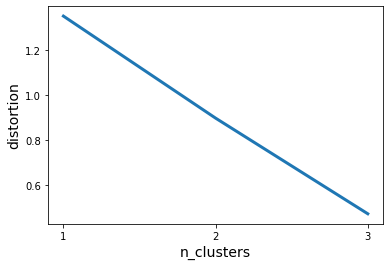

In [26]:
distortions = np.array(distortions)
n_clusters = np.array(n_clusters)
averaged_distortions = [distortions[n_clusters == n].mean() for n in np.unique(n_clusters)]

plt.plot(np.unique(n_clusters), averaged_distortions, linewidth=3)
plt.xticks(np.unique(n_clusters))
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('distortion', fontsize=14)
plt.show()